## Update Showcase Chart

In [1]:
import yfinance as yf

from pathlib import Path

from mplchart.chart import Chart

from mplchart.primitives import Candlesticks, Volume, TradeMarker, TradeSpan
from mplchart.indicators import SMA, EMA, RSI, MACD

from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats("svg")

root = Path.cwd().parent

In [2]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-02-28 00:00:00-05:00,41.954418,42.096415,41.617471,41.672825,112861600,0.0,0.0
2019-03-01 00:00:00-05:00,41.944797,42.154182,41.610259,42.110863,103544800,0.0,0.0
2019-03-04 00:00:00-05:00,42.284134,42.779924,41.870174,42.322643,109744800,0.0,0.0
2019-03-05 00:00:00-05:00,42.344321,42.358761,42.007374,42.245644,78949600,0.0,0.0
2019-03-06 00:00:00-05:00,42.038656,42.236011,41.862964,42.002556,83241600,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-22 00:00:00-05:00,183.479996,184.960007,182.460007,184.369995,52292200,0.0,0.0
2024-02-23 00:00:00-05:00,185.009995,185.039993,182.229996,182.520004,45074500,0.0,0.0
2024-02-26 00:00:00-05:00,182.240005,182.759995,180.649994,181.160004,40867400,0.0,0.0


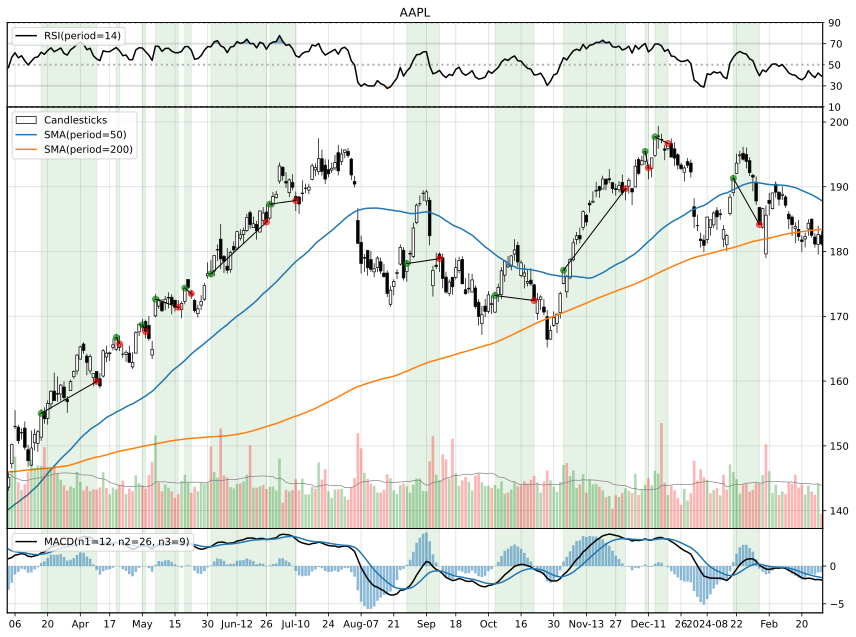

In [3]:
max_bars = 250

indicators = [
    Candlesticks(use_bars=False),
    SMA(50),
    SMA(200),
    Volume(),
    RSI(),
    MACD(),
    TradeMarker(),
    TradeSpan(),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)

In [4]:
showcase = root.joinpath("output/showcase.svg")

data = chart.render("svg")

print(f"Updating {showcase.name} ...")

showcase.write_bytes(data)

Updating showcase.svg ...


300654